<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [0]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx/view?usp=sharing
file_id = '1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('train_data.csv')

In [0]:
project_data = pd.read_csv('train_data.csv')

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#https://drive.google.com/file/d/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe/view?usp=sharing
file_id = '14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('resources.csv')

In [0]:
resource_data = pd.read_csv('resources.csv')

In [10]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


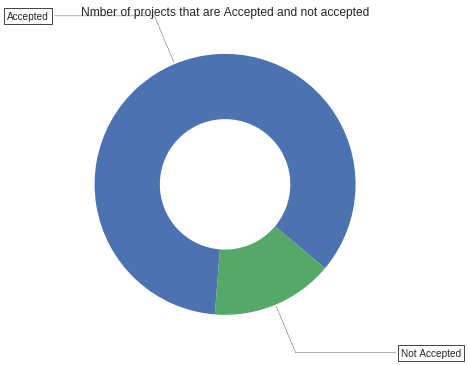

In [11]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

**Observations:**
* **Number of projects approved for funding are more than 5 times the projects that are not approed for funding**

### 1.2.1 Univariate Analysis: School State

In [12]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

In [13]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [0]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [0]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

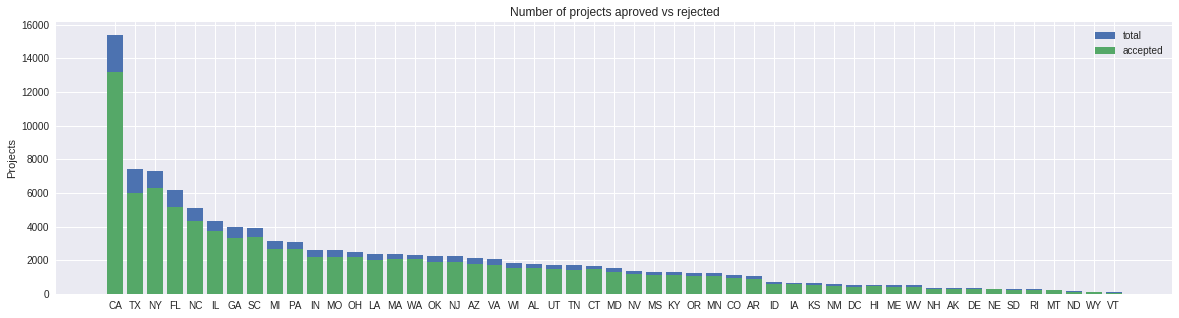

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [16]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

**Observations:**
* **The school with less approval rate is VT with 80%**
* **The school with highest approval rate is DE with 89.79%**
* **The approval rates vary between 80% and 89.79%**
* **The state with highest number of approvals is CA with 13205 and having 85.81 approval rate**
* **The state with lowest number of approvals is VT with 64 and having 80 approval rate**
* **The state with lowest approval rate is the state with lowest number of project submissions(64 out of 80 were approved)**

### 1.2.2 Univariate Analysis: teacher_prefix

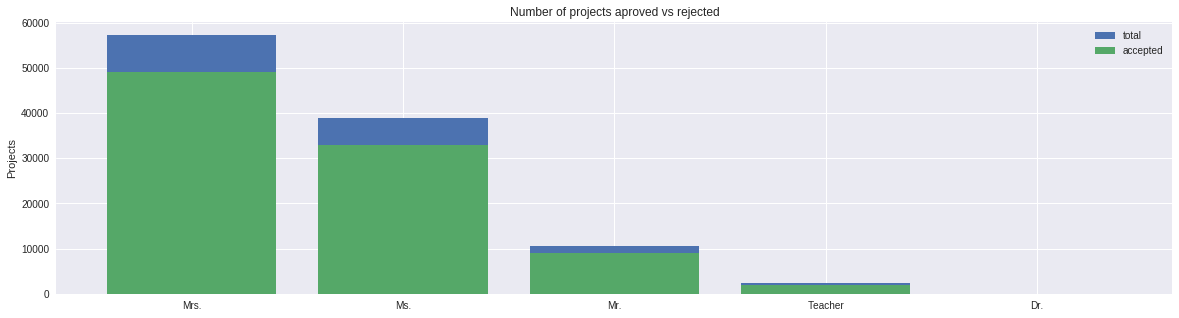

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [17]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

**Observations**
* **Total prefix used are 5** 
* **MRS is mostly used prefix with 48997 project approvals out of  57269 projects submitted with 85% approval rate**
* **DR is least used prefix with 9 project approvals out of  13 projects submitted with 69% approval rate**
* **Here we cant analyse according to gender since teachers and dr prefix may contain both men and women**

### 1.2.3 Univariate Analysis: project_grade_category

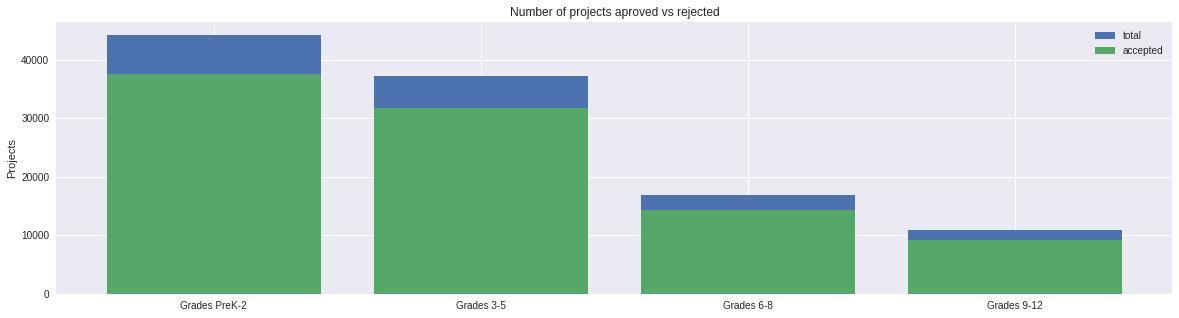

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [18]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

**Observations:**
* **Grades PreK-2 has highest number of project approvals with 37536 approvals out of 44225 submissions with 84.8 % rate**
* **As the grade increses the number of project submissions are decresing but the approval percentage is quite closer with little variation**
* **1.2.4 Univariate Analysis: project_subject_categories**
* **Literacy_Language is most popular project approved category 52239 approvals and warmth is least popular**
* **Interestly both care_hunger and warmth combined has 92% approval rate, 1212 outof 1309 submissions are approved**

### 1.2.4 Univariate Analysis: project_subject_categories

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [20]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

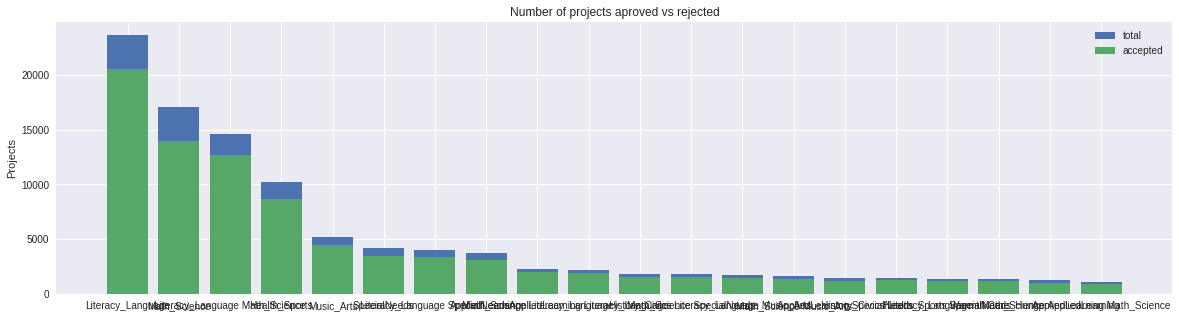

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [21]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

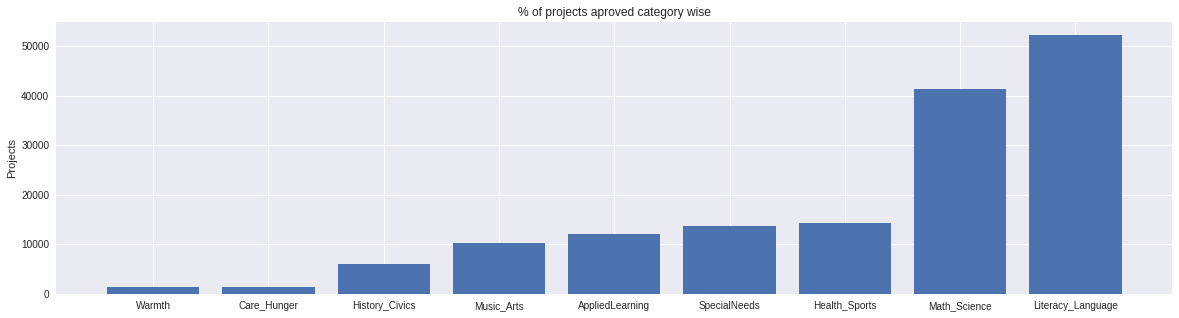

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


**observations**
* **Literacy_Language is most popular project approved category 52239 approvals and warmth is least popular**
* **Interestly both care_hunger and warmth combined has 92% approval rate, 1212 outof 1309 submissions are approved**

### 1.2.5 Univariate Analysis: project_subject_subcategories

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [26]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

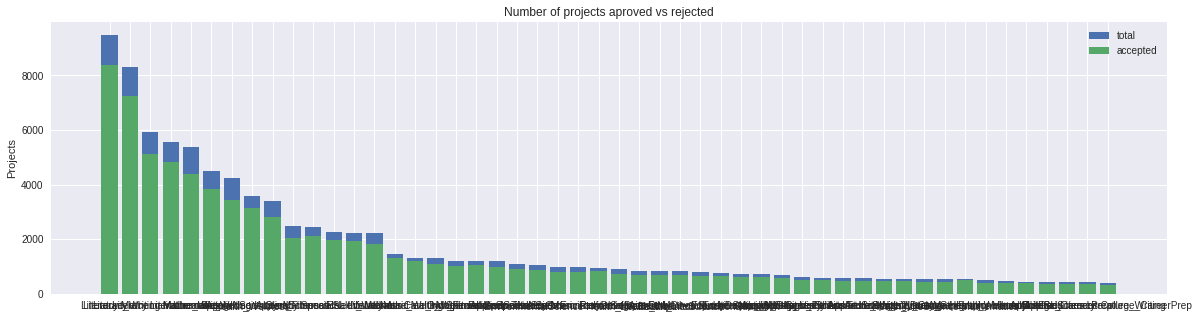

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [27]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

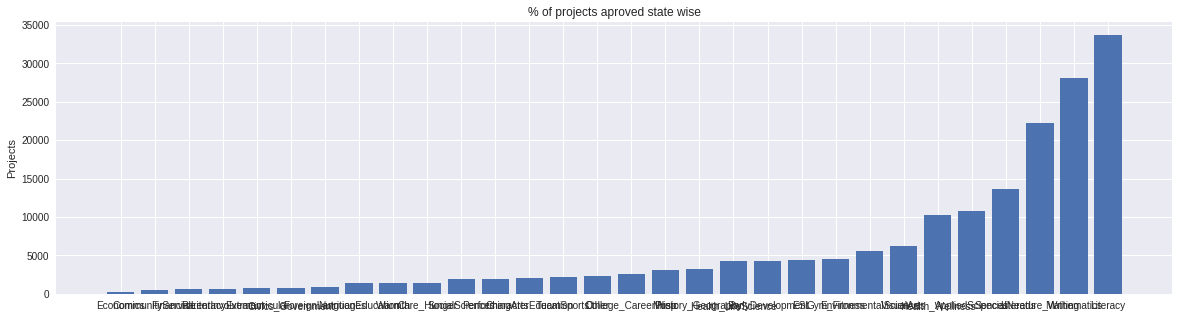

In [29]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [30]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


**observations**
* **Literacy has 33700 projects approved which is highest**
* **Economics has 269 projects approved which is lowest**

### 1.2.6 Univariate Analysis: Text features (Title)

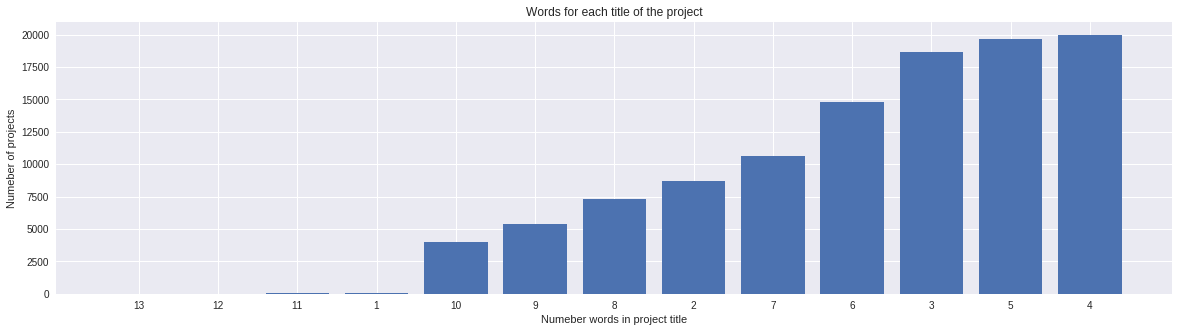

In [31]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [0]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

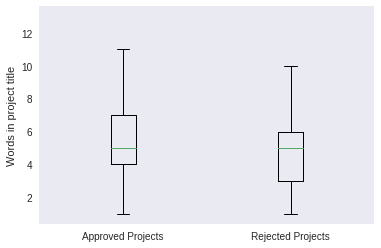

In [33]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

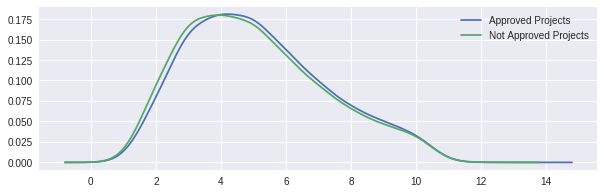

In [34]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

**Observations:**
* **Number of words in the title is varies between 1 and 13**
* **projects with 4 words are almost 20000 which is highjest**
* **projects with 13 words are present in least number**
* **75% of rejected projects have word count less than 6**
* **25% of rejected projects have word count less than 3**
* **25% of approved projects have word count less than 7 to 13**
* **The project with highest number of words is 13 and it is approved**
* **When the word count is less than 4 the density of rejected projects is more(approved projects < rejected projects)**
* **When the wordcount is greater than 4 more projects are getting approved**

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

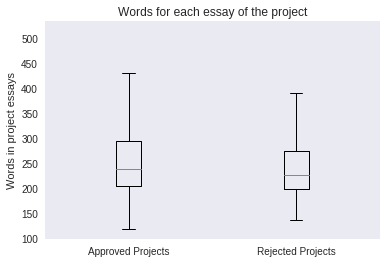

In [37]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

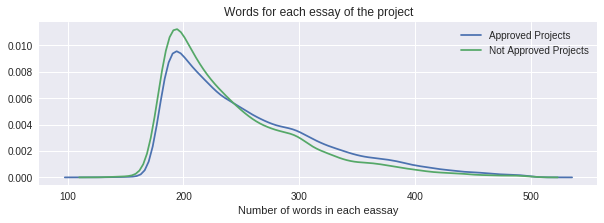

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()

plt.show()

**observations:**
* **The project with highest number of words in the project is approved**
* **75% of approved projects have more than 205 words**
* **50% of approved projects has 205 to 295 words**
* **For the projects having  word count less than 250,the probability of project getting rejected is more than the probability of getting approved**
* **If the word count is less than 250 the probability of project getting approved is more than the probability of getting rejected**


### 1.2.8 Univariate Analysis: Cost per project

In [39]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [40]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [0]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

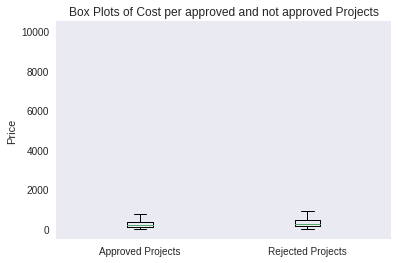

In [43]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

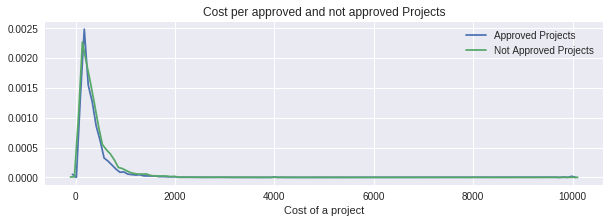

In [44]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [45]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

**Observation**
* **Most number of projects have cost less than 1000$**

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

In [0]:
approved_count = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects']
approved_count = approved_count.values

rejected_count = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects']
rejected_count = rejected_count.values

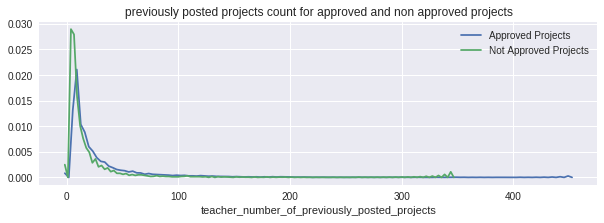

In [47]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.title('previously posted projects count for approved and non approved projects')
plt.show()

In [48]:
project_data['teacher_number_of_previously_posted_projects'].describe()

count    109248.000000
mean         11.153165
std          27.777154
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max         451.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

**Observations**
*  **The minimum number of previously posted projects is 0 and maximum is 451**
*  **more number of teachers has previous project count as less than 100**

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [49]:
project_data['project_resource_summary'].describe()

count                                                109248
unique                                               108324
top       My students need electronic tablets to do all ...
freq                                                     48
Name: project_resource_summary, dtype: object

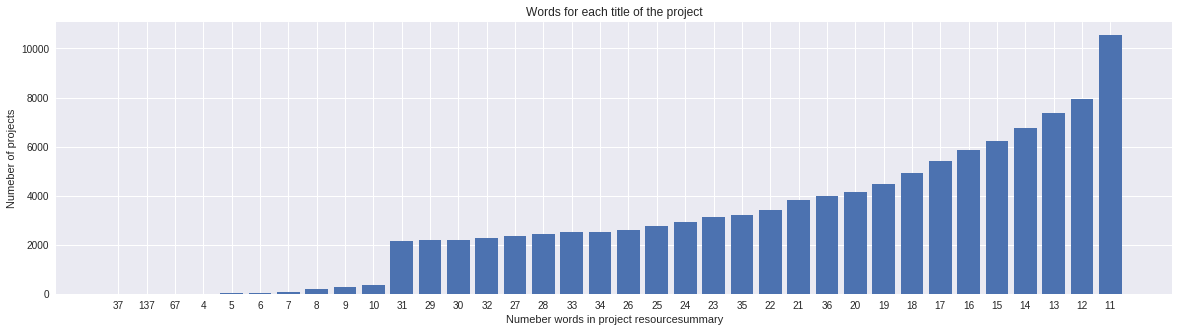

In [50]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_resource_summary'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project resourcesummary')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [0]:
approved_summary_word_count = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_summary_word_count = approved_summary_word_count.values

rejected_summary_word_count = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_summary_word_count = rejected_summary_word_count.values

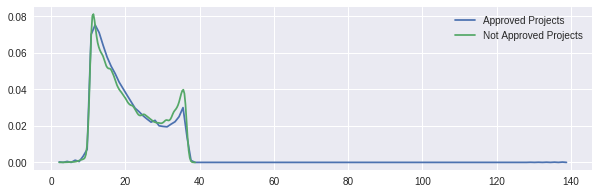

In [52]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_summary_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_summary_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

**Observations**
* **More than 10000 project have resource summary word count of 11 which is suceeding by 12 with 8000 projects**
* **The projects with word count of resorce summary more than 40 are negligible**
* **If the word count is less than 23 the chances of getting approved is high**
* **For the summary having word count more than 40 we cant infer the chance whether the project is approved or not**


## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [53]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23  
1  Our students arrive to our school eager to lea...  299.0         1

In [54]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [56]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [57]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [58]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [60]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:07<00:00, 1626.89it/s]


In [61]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [62]:
# similarly you can preprocess the titles also

print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)


Educational Support for English Learners at Home
More Movement with Hokki Stools


In [63]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 34793.02it/s]


In [64]:
preprocessed_titles[20000]

'we need to move it while we input it'

## 1. 4 Preparing data for models

In [65]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [66]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [67]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))



In [69]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
##Vectorizing school_state
# we use count vectorizer to convert the values into one hot encoded features
#

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())
school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)


['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (109248, 51)


In [70]:
print(project_data["teacher_prefix"])

0            Mrs.
1             Mr.
2             Ms.
3            Mrs.
4            Mrs.
5            Mrs.
6            Mrs.
7             Ms.
8            Mrs.
9             Ms.
10           Mrs.
11            Ms.
12           Mrs.
13           Mrs.
14            Ms.
15            Ms.
16           Mrs.
17            Ms.
18           Mrs.
19            Ms.
20           Mrs.
21           Mrs.
22            Ms.
23            Mr.
24           Mrs.
25           Mrs.
26            Ms.
27        Teacher
28           Mrs.
29           Mrs.
           ...   
109218       Mrs.
109219    Teacher
109220       Mrs.
109221    Teacher
109222        Ms.
109223        Ms.
109224        Ms.
109225       Mrs.
109226        Ms.
109227       Mrs.
109228       Mrs.
109229       Mrs.
109230        Ms.
109231       Mrs.
109232       Mrs.
109233        Ms.
109234        Ms.
109235       Mrs.
109236       Mrs.
109237       Mrs.
109238       Mrs.
109239       Mrs.
109240       Mrs.
109241       Mrs.
109242    

In [0]:
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    if not isinstance(word, float):
      word = word.replace('.',' ')
      my_counter.update(word.split())
       
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [72]:
##Vectorizing teacher_prefix
# we use count vectorizer to convert the values into one hot encoded features
#https://blog.csdn.net/ningzhimeng/article/details/80953916
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())
teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)


['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encodig  (109248, 5)


In [0]:
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))


In [74]:
##Vectorizing project_grade_category
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())
project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)


['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encodig  (109248, 5)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [75]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df = 60)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 7972)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [76]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=60)
titles_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",titles_bow.shape)

Shape of matrix after one hot encodig  (109248, 1004)


#### 1.4.2.3 TFIDF vectorizer

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=60)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 7972)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [90]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=60)
titles_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)


Shape of matrix after one hot encodig  (109248, 1004)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [84]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [85]:
!ls


adc.json  gdrive  resources.csv  sample_data  train_data.csv


In [0]:
!cp "/content/gdrive/My Drive/glove.42B.300d.txt" "glove.42B.300d.txt"

In [82]:
!ls

adc.json  resources.csv  sample_data  train_data.csv


In [100]:
# Reading glove vecors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')



867it [00:00, 8666.33it/s]

Loading Glove Model


329739it [00:36, 9051.15it/s]

Done. 329739  words loaded!


In [101]:
words = []
for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))




all the words in the coupus 473570
the unique words in the coupus 16903
The number of words that are present in both glove vectors and our coupus 14930 ( 88.328 %)
word 2 vec length 14930


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove.42B.300d.txt', 'wb') as f:
    pickle.dump(words_courpus, f)

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove.42B.300d.txt', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [104]:
# average Word2Vec
# compute average word2vec for preprocessed_essays .
avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector_titles = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles += model[word]
            cnt_words_titles += 1
    if cnt_words_titles != 0:
        vector_titles /= cnt_words_titles
    avg_w2v_vectors_titles.append(vector_titles)

print(len(avg_w2v_vectors_titles))
print(len(avg_w2v_vectors_titles[0]))

100%|██████████| 109248/109248 [00:01<00:00, 68280.89it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
      
          

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [106]:
from sklearn.manifold import TSNE
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector= np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109248/109248 [00:03<00:00, 27673.49it/s]

109248
300


### 1.4.3 Vectorizing Numerical features

In [0]:
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler


In [92]:
price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_normalized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [93]:
price_normalized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [94]:
#teacher_number_of_previously_posted_projects feature 
tnpp_scalar = StandardScaler()
tnpp_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {tnpp_scalar.mean_[0]}, Standard deviation : {np.sqrt(tnpp_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
tnpp_normalized = tnpp_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


Mean : 11.153165275336848, Standard deviation : 27.77702641477403


In [0]:
label = project_data['project_is_approved']

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [0]:
from scipy.sparse import hstack

In [120]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot.shape,school_state_one_hot.shape,titles_bow,tnpp_normalized,price_normalized))
X.shape

(109248, 1101)

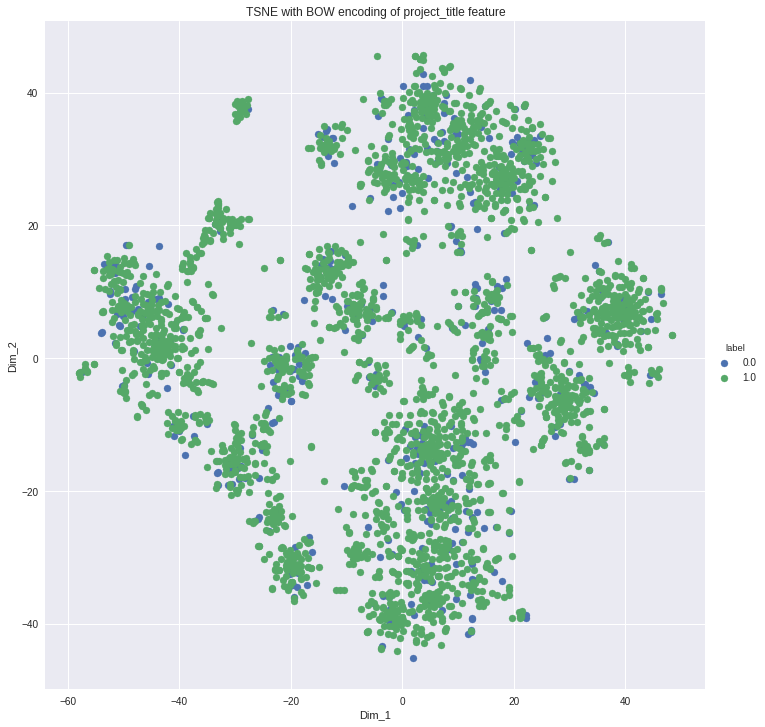

In [121]:
#The reference for this code is the sample code explained for tsne in the videos
from sklearn.manifold import TSNE

# Picking the top 3000 points as TSNE takes a lot of time for all the  points
X1 = X.tocsr()
X1_3000 = X1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 30,n_iter = 1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(X1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with BOW encoding of project_title feature')
plt.show()
    

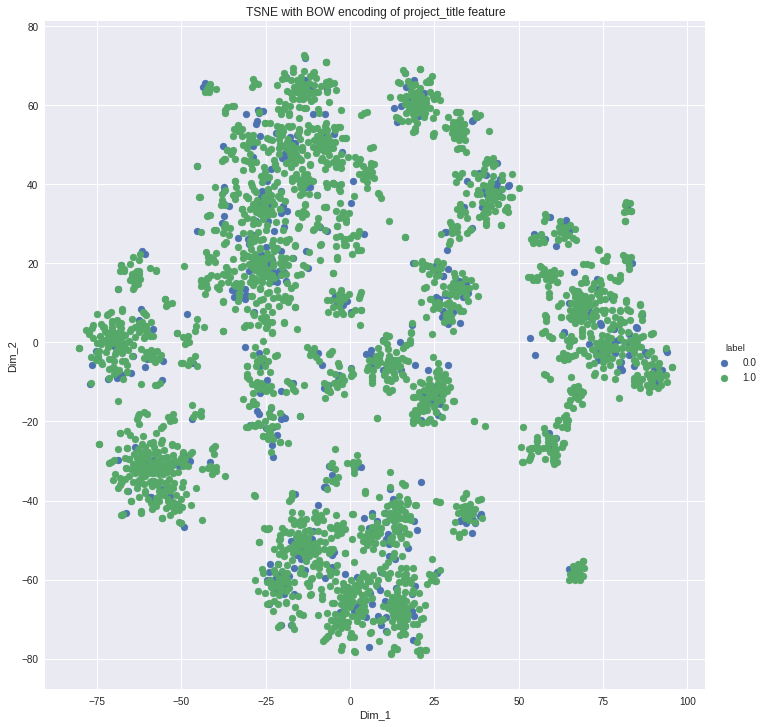

In [131]:
#The reference for this code is the sample code explained for tsne in the videos
from sklearn.manifold import TSNE

# Picking the top 3000 points as TSNE takes a lot of time for all the  points
X1 = X.tocsr()
X1_3000 = X1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 15,n_iter = 3000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 15
# default Maximum number of iterations for the optimization = 3000

tsne_data = model.fit_transform(X1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with BOW encoding of project_title feature')
plt.show()

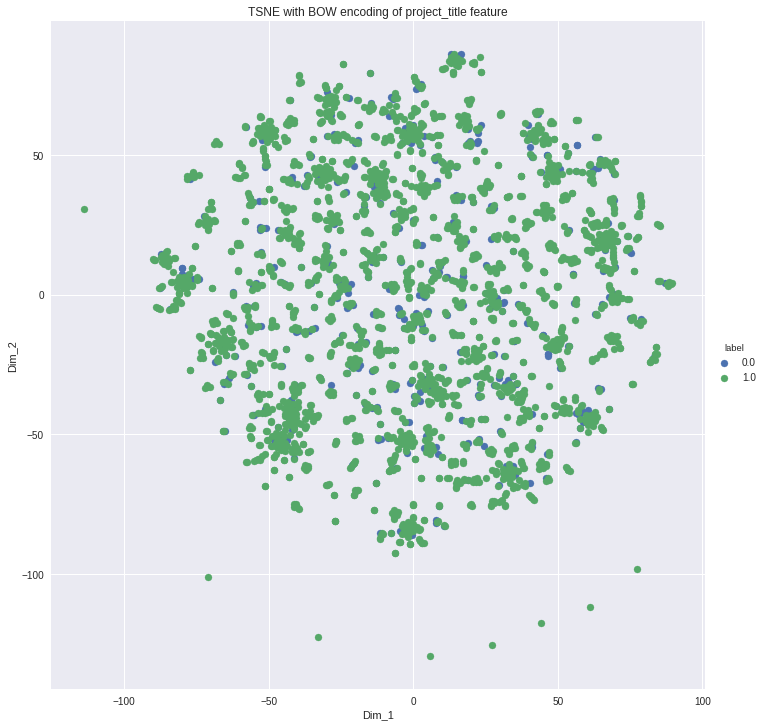

In [138]:
#The reference for this code is the sample code explained for tsne in the videos
from sklearn.manifold import TSNE

# Picking the top 3000 points as TSNE takes a lot of time for all the  points
X1 = X.tocsr()
X1_3000 = X1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 2)
# configuring the parameteres
# the number of components = 2
# default perplexity = 2
# default Maximum number of iterations for the optimization 

tsne_data = model.fit_transform(X1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with BOW encoding of project_title feature')
plt.show()

**Observations**

* **From the plots we can understand that the positive and negative points are not well sepearted and most of the points are overlapping on each other**
* **By comparing the above 3 plots we can observe that at higher perplexity the plots are better than those of at lower perplexity**


<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [122]:
Y = hstack((categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot.shape,school_state_one_hot.shape,titles_tfidf ,tnpp_normalized,price_normalized))
Y.shape

(109248, 1101)

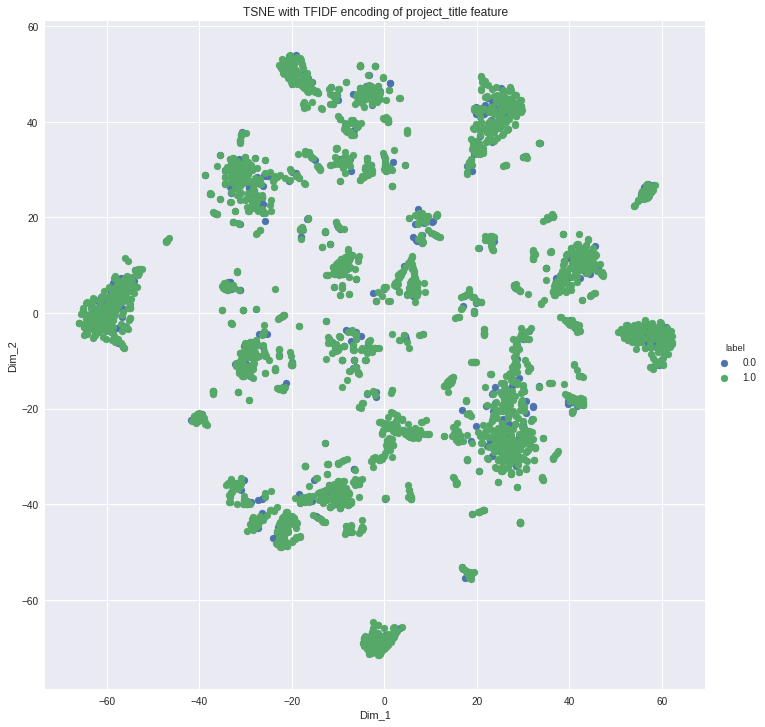

In [123]:
#The reference for this code is the sample code explained for tsne in the videos    
# Picking the top 3000 points as TSNE takes a lot of time for all the points
Y1 = Y.tocsr()
Y1_3000 = Y1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 30,n_iter = 1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(Y1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature')
plt.show()
    
    

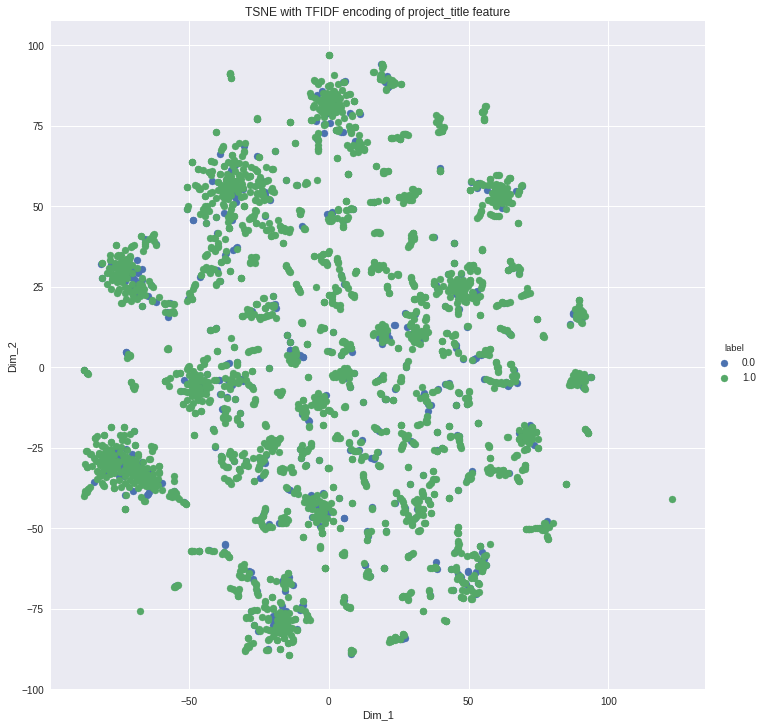

In [132]:
#The reference for this code is the sample code explained for tsne in the videos    
# Picking the top 3000 points as TSNE takes a lot of time for all the points
Y1 = Y.tocsr()
Y1_3000 = Y1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 5,n_iter = 1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 5
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(Y1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature')
plt.show()
    

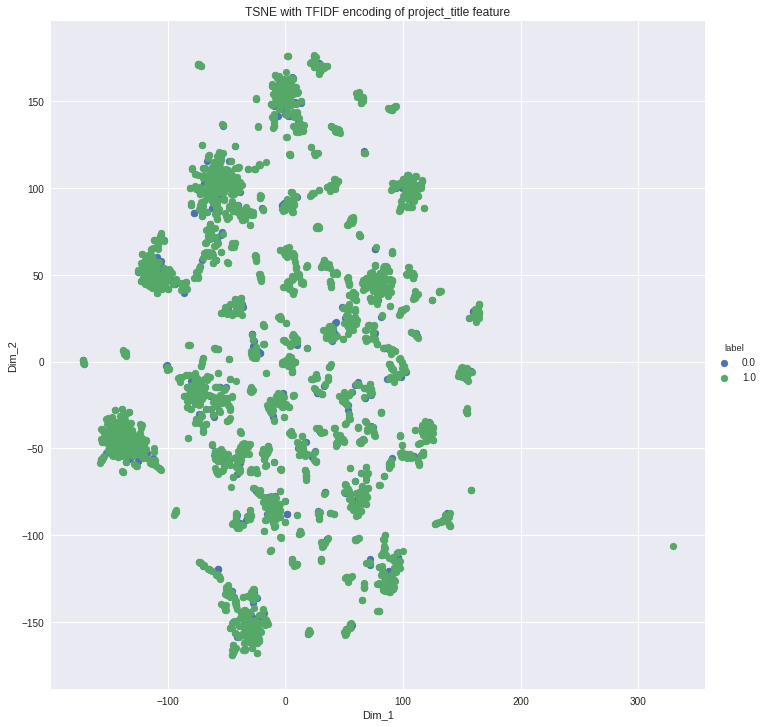

In [133]:
#The reference for this code is the sample code explained for tsne in the videos    
# Picking the top 3000 points as TSNE takes a lot of time for all the points
Y1 = Y.tocsr()
Y1_3000 = Y1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 5,n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 5
# default Maximum number of iterations for the optimization = 5000

tsne_data = model.fit_transform(Y1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature')
plt.show()

**Observation**
* **most of the points are overlapping on eachother**
* **we can observe few blue dots but there is no seperation between blues and greens**

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [124]:
B= hstack((categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot.shape,school_state_one_hot.shape,avg_w2v_vectors_titles,tnpp_normalized,price_normalized))
B.shape

(109248, 397)

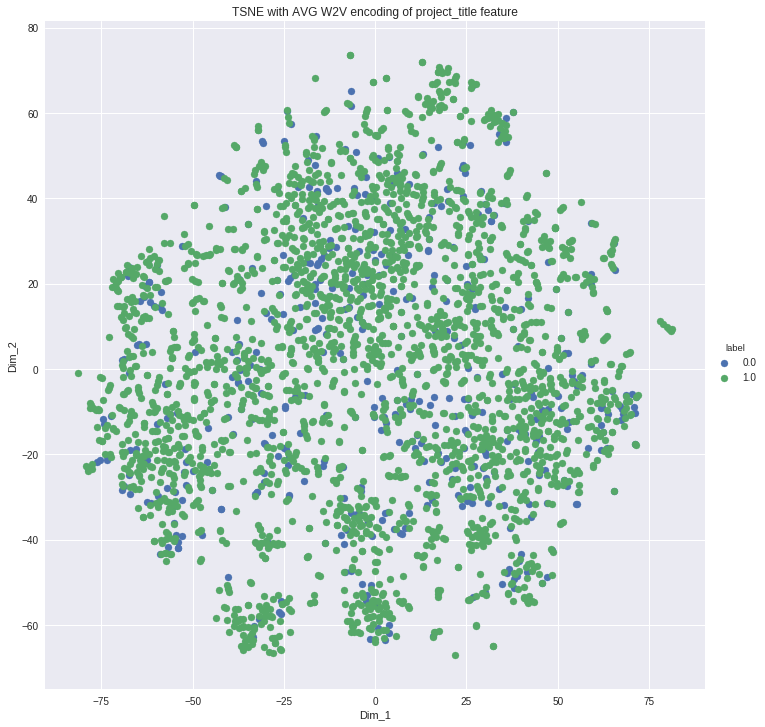

In [125]:
#The reference for this code is the sample code explained for tsne in the videos    
# Picking the top 3000 points as TSNE takes a lot of time for all the points
B1 = B.tocsr()
B1_3000 = B1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 15)
# configuring the parameteres
# the number of components = 2
# default perplexity = 15
# default Maximum number of iterations for the optimization

tsne_data = model.fit_transform(B1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with AVG W2V encoding of project_title feature')
plt.show()
    
    

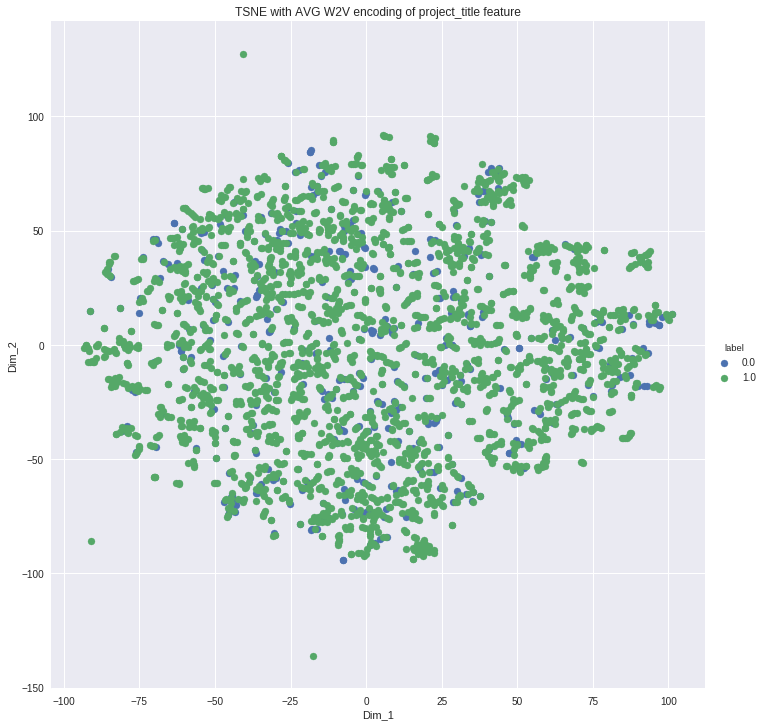

In [134]:
#The reference for this code is the sample code explained for tsne in the videos    
# Picking the top 3000 points as TSNE takes a lot of time for all the points
B1 = B.tocsr()
B1_3000 = B1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,perplexity = 5,n_iter =1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 5
# default Maximum number of iterations for the optimization =1000

tsne_data = model.fit_transform(B1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with AVG W2V encoding of project_title feature')
plt.show()
    
    

**Observations**
* **here the plot at perplexity = 15 is giving better results than at perplexity = 5. But the positive and negative points were not seperated and were overlapping**

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [126]:
Z = hstack((categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot.shape,school_state_one_hot.shape,tfidf_w2v_vectors,tnpp_normalized,price_normalized))
Z.shape

(109248, 397)

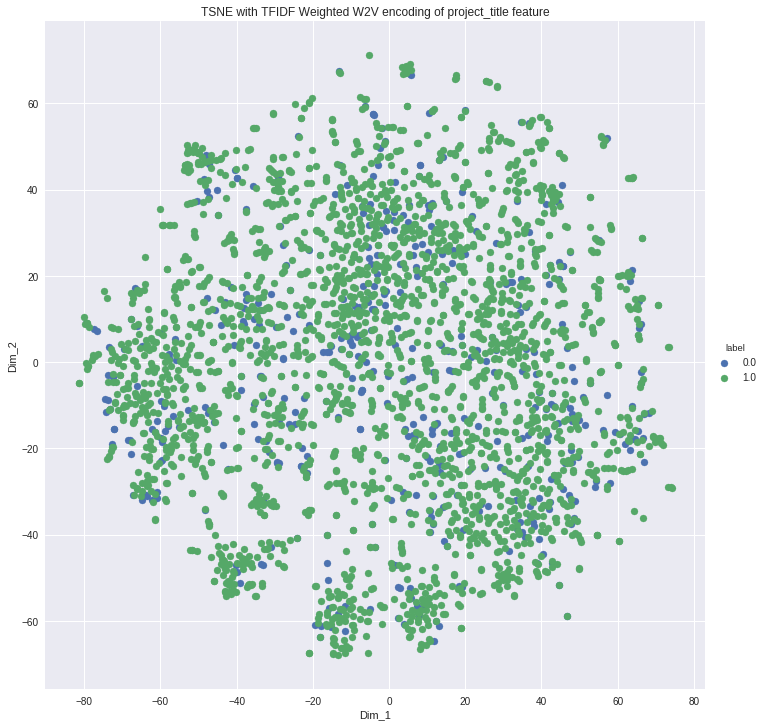

In [127]:
 #The reference for this code is the sample code explained for tsne in the videos
  # Picking the top 3000 points as TSNE takes a lot of time for all the points
Z1 = Z.tocsr()
Z1_3000 = Z1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0 ,perplexity = 15)
# configuring the parameteres
# the number of components = 2
# default perplexity = 15
# default Maximum number of iterations for the optimization
tsne_data = model.fit_transform(Z1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with TFIDF Weighted W2V encoding of project_title feature')
plt.show()
    

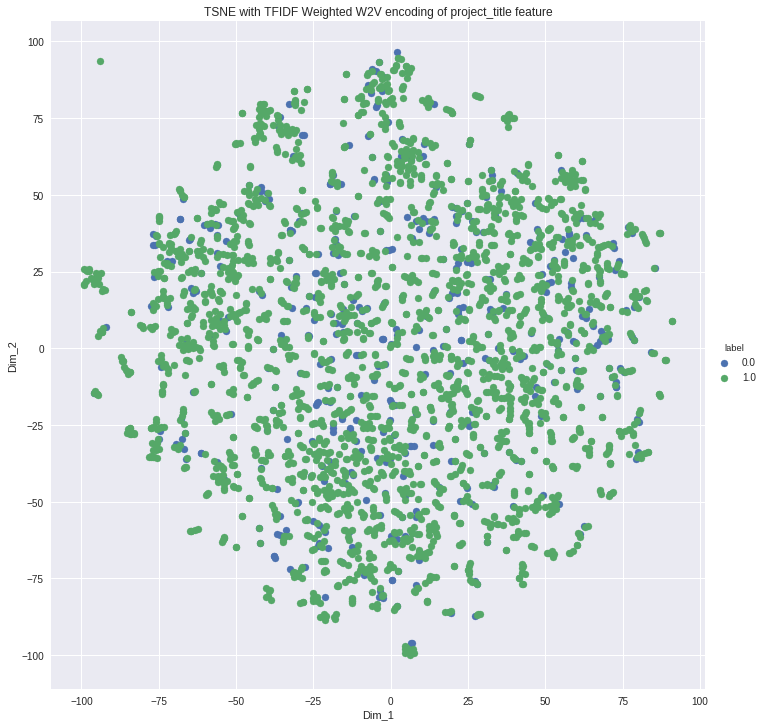

In [135]:
#The reference for this code is the sample code explained for tsne in the videos
  # Picking the top 3000 points as TSNE takes a lot of time for all the points
Z1 = Z.tocsr()
Z1_3000 = Z1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0 ,perplexity = 5)
# configuring the parameteres
# the number of components = 2
# default perplexity = 5
# default Maximum number of iterations for the optimization
tsne_data = model.fit_transform(Z1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with TFIDF Weighted W2V encoding of project_title feature')
plt.show()
    

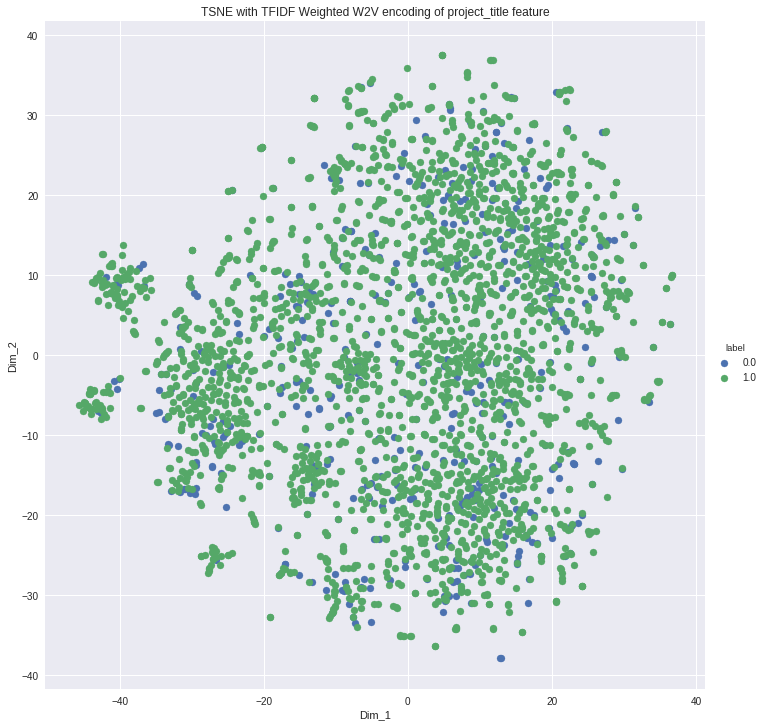

In [136]:
#The reference for this code is the sample code explained for tsne in the videos
  # Picking the top 3000 points as TSNE takes a lot of time for all the points
Z1 = Z.tocsr()
Z1_3000 = Z1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,n_iter =500)
# configuring the parameteres
# the number of components = 2
# default Maximum number of iterations for the optimization =500
tsne_data = model.fit_transform(Z1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with TFIDF Weighted W2V encoding of project_title feature')
plt.show()
    

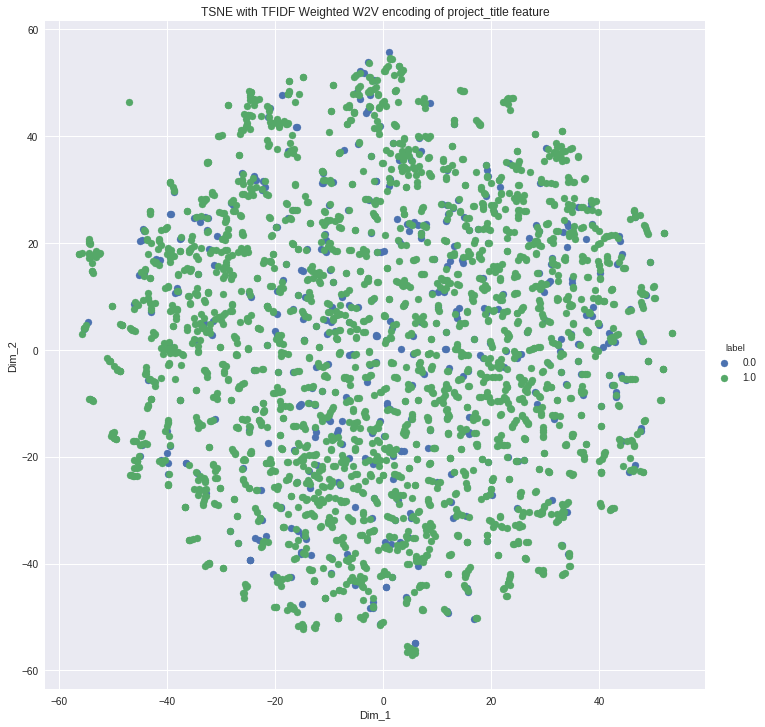

In [139]:
#The reference for this code is the sample code explained for tsne in the videos
  # Picking the top 3000 points as TSNE takes a lot of time for all the points
Z1 = Z.tocsr()
Z1_3000 = Z1[0:3000,:]
project_is_approved_3000 = label[0:3000]

model = TSNE(n_components=2, random_state=0,n_iter =500, perplexity= 5)
# configuring the parameteres
# the number of components = 2
# default Maximum number of iterations for the optimization =500
tsne_data = model.fit_transform(Z1_3000.toarray())


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE with TFIDF Weighted W2V encoding of project_title feature')
plt.show()

**Observations**
* **Here we can see 2 plots with perplexity 15 and 5 and a plot with iterations = 500 and a plot with perplexity =2 and iterations = 500**
* **Of all those plots the overlapping comparitively less on the plot with iterations =500,but the points are not seperated**

##All features together

In [128]:
C = hstack((categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot.shape,school_state_one_hot.shape,tfidf_w2v_vectors,tnpp_normalized,\
    price_normalized,text_bow,titles_bow,avg_w2v_vectors_titles,titles_tfidf, text_tfidf))
C.shape

(109248, 18649)

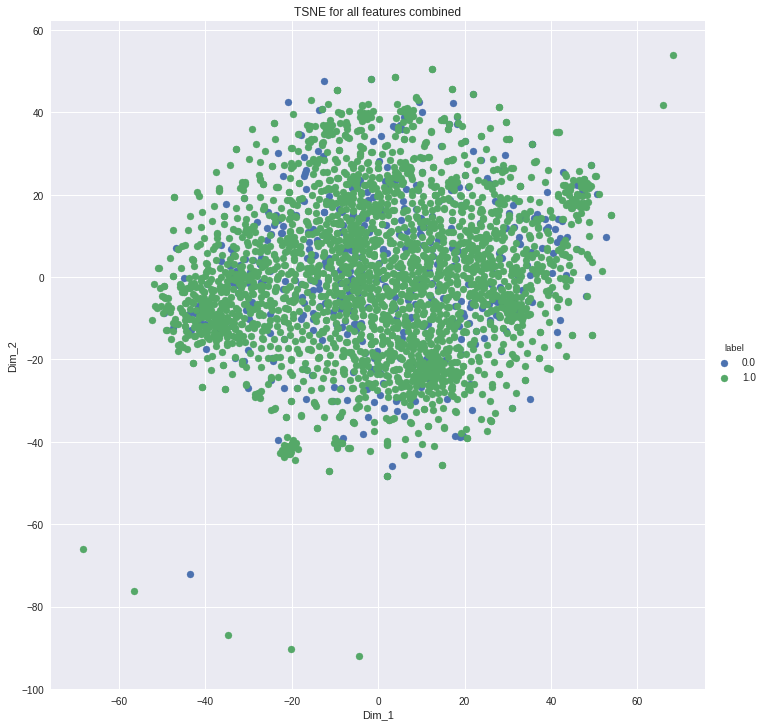

In [129]:
#The reference for this code is the sample code explained for tsne in the videos
#picking top 3000 points as it will take longer time to run tsne on whole points
C1 = C.tocsr()
C1_3000 = C1[0:3000,:]
project_is_approved_3000 = label[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity = 15)
# configuring the parameteres
# the number of components = 2
# default perplexity = 15
tsne_data = model.fit_transform(C1_3000.toarray())

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE for all features combined')
plt.show()

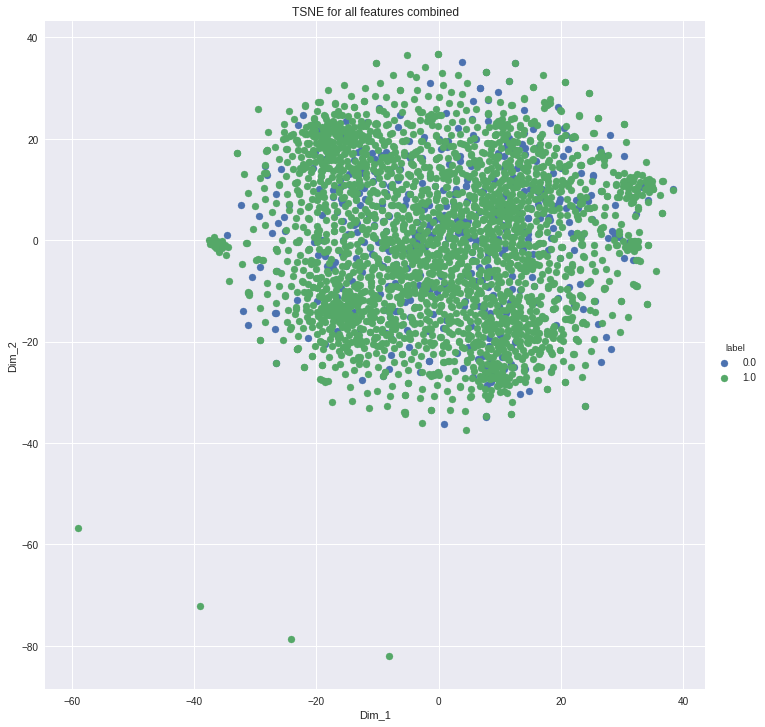

In [130]:
#The reference for this code is the sample code explained for tsne in the videos
#picking top 3000 points as it will take longer time to run tsne on whole points
C1 = C.tocsr()
C1_3000 = C1[0:3000,:]
project_is_approved_3000 = label[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity = 25,n_iter = 1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 25
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(C1_3000.toarray())

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE for all features combined')
plt.show()

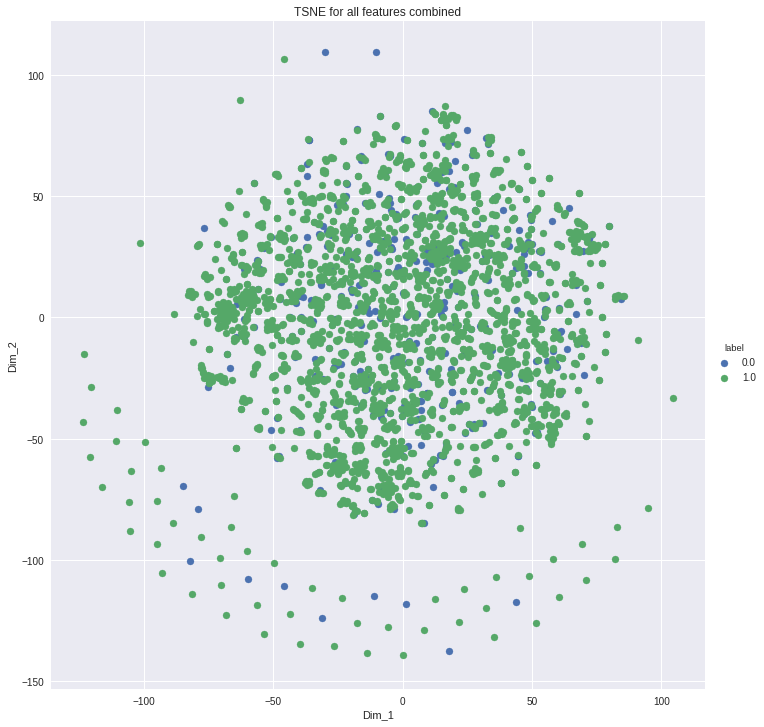

In [137]:
#The reference for this code is the sample code explained for tsne in the videos
#picking top 3000 points as it will take longer time to run tsne on whole points
C1 = C.tocsr()
C1_3000 = C1[0:3000,:]
project_is_approved_3000 = label[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity = 2,n_iter = 1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 2
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(C1_3000.toarray())

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, project_is_approved_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE for all features combined')
plt.show()

**Observations**
* **when all the features were taken togetherwe can observe outliers from the first 2 plots**
* **The points were not well seperated and many points are overlapping on each other**

<h2> 2.5 Conclusions </h2>

##**Observations made from exploratory data analysis**

---


* **Number of projects approved for funding are more than 5 times the projects that are not approved for funding**
* **The school with less approval rate is VT with 80%**
* **The school with highest approval rate is DE with 89.79%**
* **The approval rates vary between 80% and 89.79%**
* **The state with highest number of approvals is CA with 13205 and having 85.81 approval rate**
* **The state with lowest number of approvals is VT with 64 and having 80 approval rate**
* **The state with lowest approval rate is the state with lowest number of project submissions(64 out of 80 were approved)**
* **Total prefix used are 5** 
* **MRS is mostly used prefix with 48997 project approvals out of  57269 projects submitted with 85% approval rate**
* **DR is least used prefix with 9 project approvals out of  13 projects submitted with 69% approval rate**
* **Here we cant analyse according to gender since teachers and dr prefix may contain both men and women**
* **Grades PreK-2 has highest number of project approvals with 37536 approvals out of 44225 submissions with 84.8 % rate**
* **As the grade increses the number of project submissions are decresing but the approval percentage is quite closer with little variation**
* **Literacy_Language is most popular project approved category 52239 approvals and warmth is least popular**
* **Interestly both care_hunger and warmth combined has 92% approval rate, 1212 outof 1309 submissions are approved**
* **Literacy has 33700 projects approved which is highest**
* **Economics has 269 projects approved which is lowest**          
* **Number of words in the title is varies between 1 and 13**
* **projects with 4 words are almost 20000 which is highjest**
* **projects with 13 words are present in least number**
* **75% of rejected projects have word count less than 6**
* **25% of rejected projects have word count less than 3**
* **25% of approved projects have word count less than 7 to 13**
* **The project with highest number of words is 13 and it is approved**
* **When the word count is less than 4 the density of rejected projects is more(approved projects < rejected projects)**
* **When the wordcount is greater than 4 more projects are getting approved**
* **The project with highest number of words in the project is approved**
* **75% of approved projects have more than 205 words**
* **50% of approved projects has 205 to 295 words**
* **For the projects having  word count less than 250,the probability of project getting rejected is more than the probability of getting approved**
* **If the word count is less than 250 the probability of project getting approved is more than the probability of getting rejected**
* **Most number of projects have cost less than 1000$**



##The observations for the TSne plots were mentioned under each plot##




